In [60]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.tsa.stattools import adfuller

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## Monthly Financial Time Series Data : USA Housing Market Factors 

In [53]:
dataset_path = r"https://raw.githubusercontent.com/Karanpalshekhawat/world-quant-mfe/main/Monthly_Macroeconomic_Factors.csv"
df = pd.read_csv(dataset_path, parse_dates=["Date"])
df = df.set_index('Date')

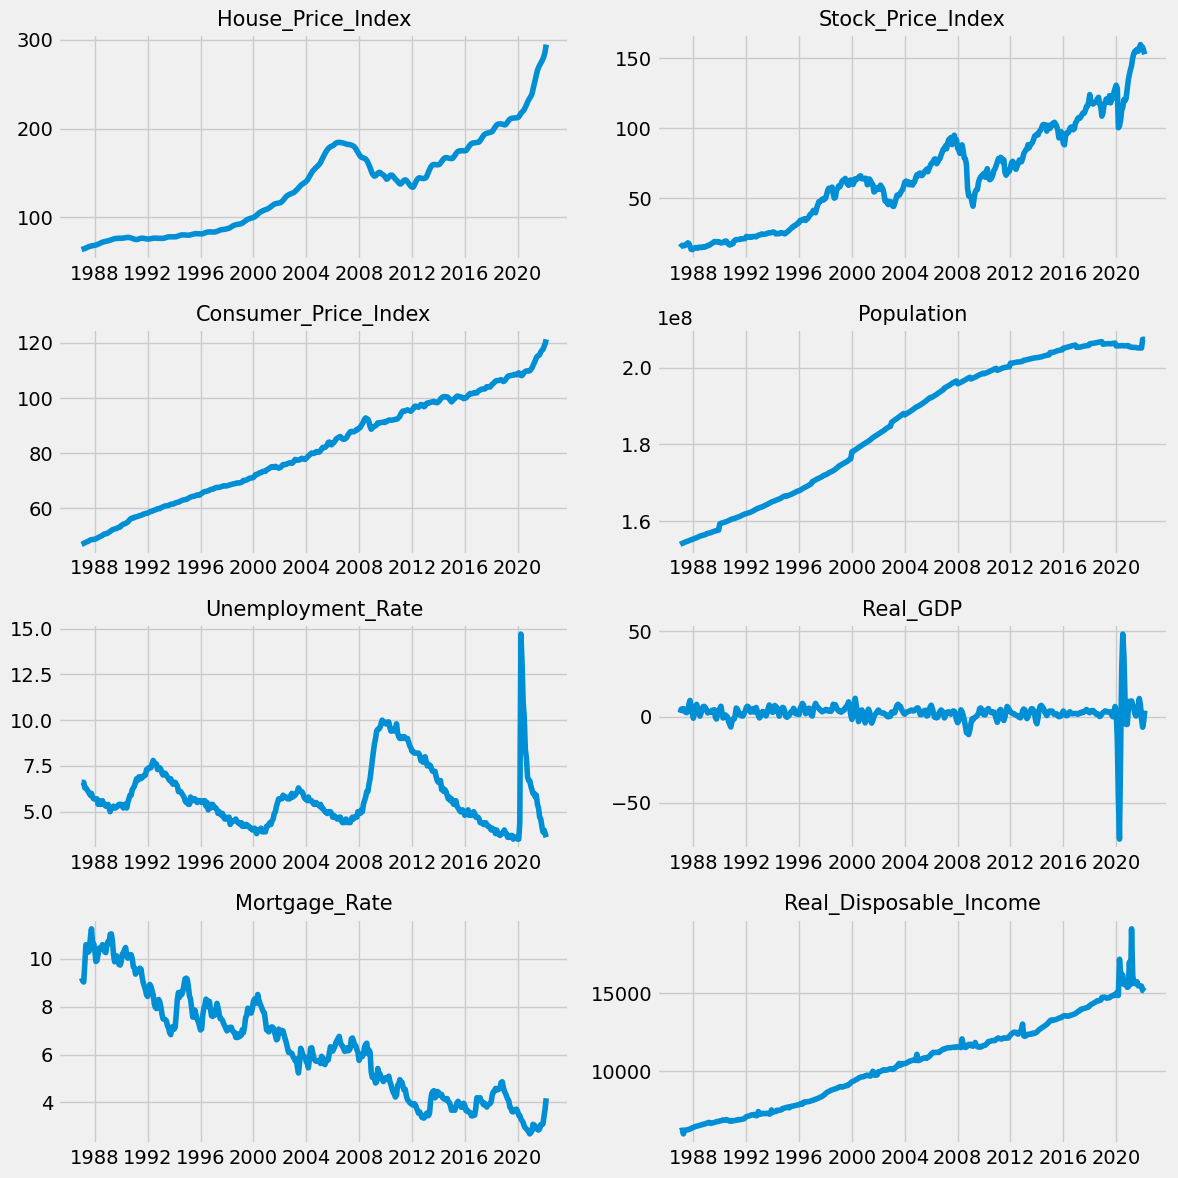

In [65]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
axes[0, 0].plot(df.index, df['House_Price_Index'])
axes[0, 1].plot(df.index, df['Stock_Price_Index'])
axes[1, 0].plot(df.index, df['Consumer_Price_Index'])
axes[1, 1].plot(df.index, df['Population'])
axes[2, 0].plot(df.index, df['Unemployment_Rate'])
axes[2, 1].plot(df.index, df['Real_GDP'])
axes[3, 0].plot(df.index, df['Mortgage_Rate'])
axes[3, 1].plot(df.index, df['Real_Disposable_Income'])

# Add titles and labels
axes[0, 0].set_title('House_Price_Index', fontsize=15)
axes[0, 1].set_title('Stock_Price_Index', fontsize=15)
axes[1, 0].set_title('Consumer_Price_Index', fontsize=15)
axes[1, 1].set_title('Population', fontsize=15)
axes[2, 0].set_title('Unemployment_Rate', fontsize=15)
axes[2, 1].set_title('Real_GDP', fontsize=15)
axes[3, 0].set_title('Mortgage_Rate', fontsize=15)
axes[3, 1].set_title('Real_Disposable_Income', fontsize=15)
plt.tight_layout()
plt.show()

### Stationarity Tests for all market factors : Visually all look Non Stationary

In [71]:
p_values_dict = {}
for col in df.columns:
    adf_test = adfuller(df[col].values, regression="n")
    p_values_dict[col] = adf_test[1]

In [76]:
df_pvalue = pd.DataFrame(p_values_dict.items(), columns=['Time Series Name', 'P-Value'])
df_pvalue

,Time Series Name,P-Value
0,House_Price_Index,0.990472
1,Stock_Price_Index,0.984063
2,Consumer_Price_Index,0.997718
3,Population,0.999999
4,Unemployment_Rate,0.292604
5,Real_GDP,0.000338
6,Mortgage_Rate,0.154478
7,Real_Disposable_Income,0.996117


### We ran ADF test assuming no constant and no trend i.e. directly on the time series.

### As p-value for all financial time series (apart from Real GDP) is greater than 0.05, it means that we cannot reject the Null hypothesis that is there is a presence of unit root implying all of them are Non-Stationary.

---

### Seasonal Analysis

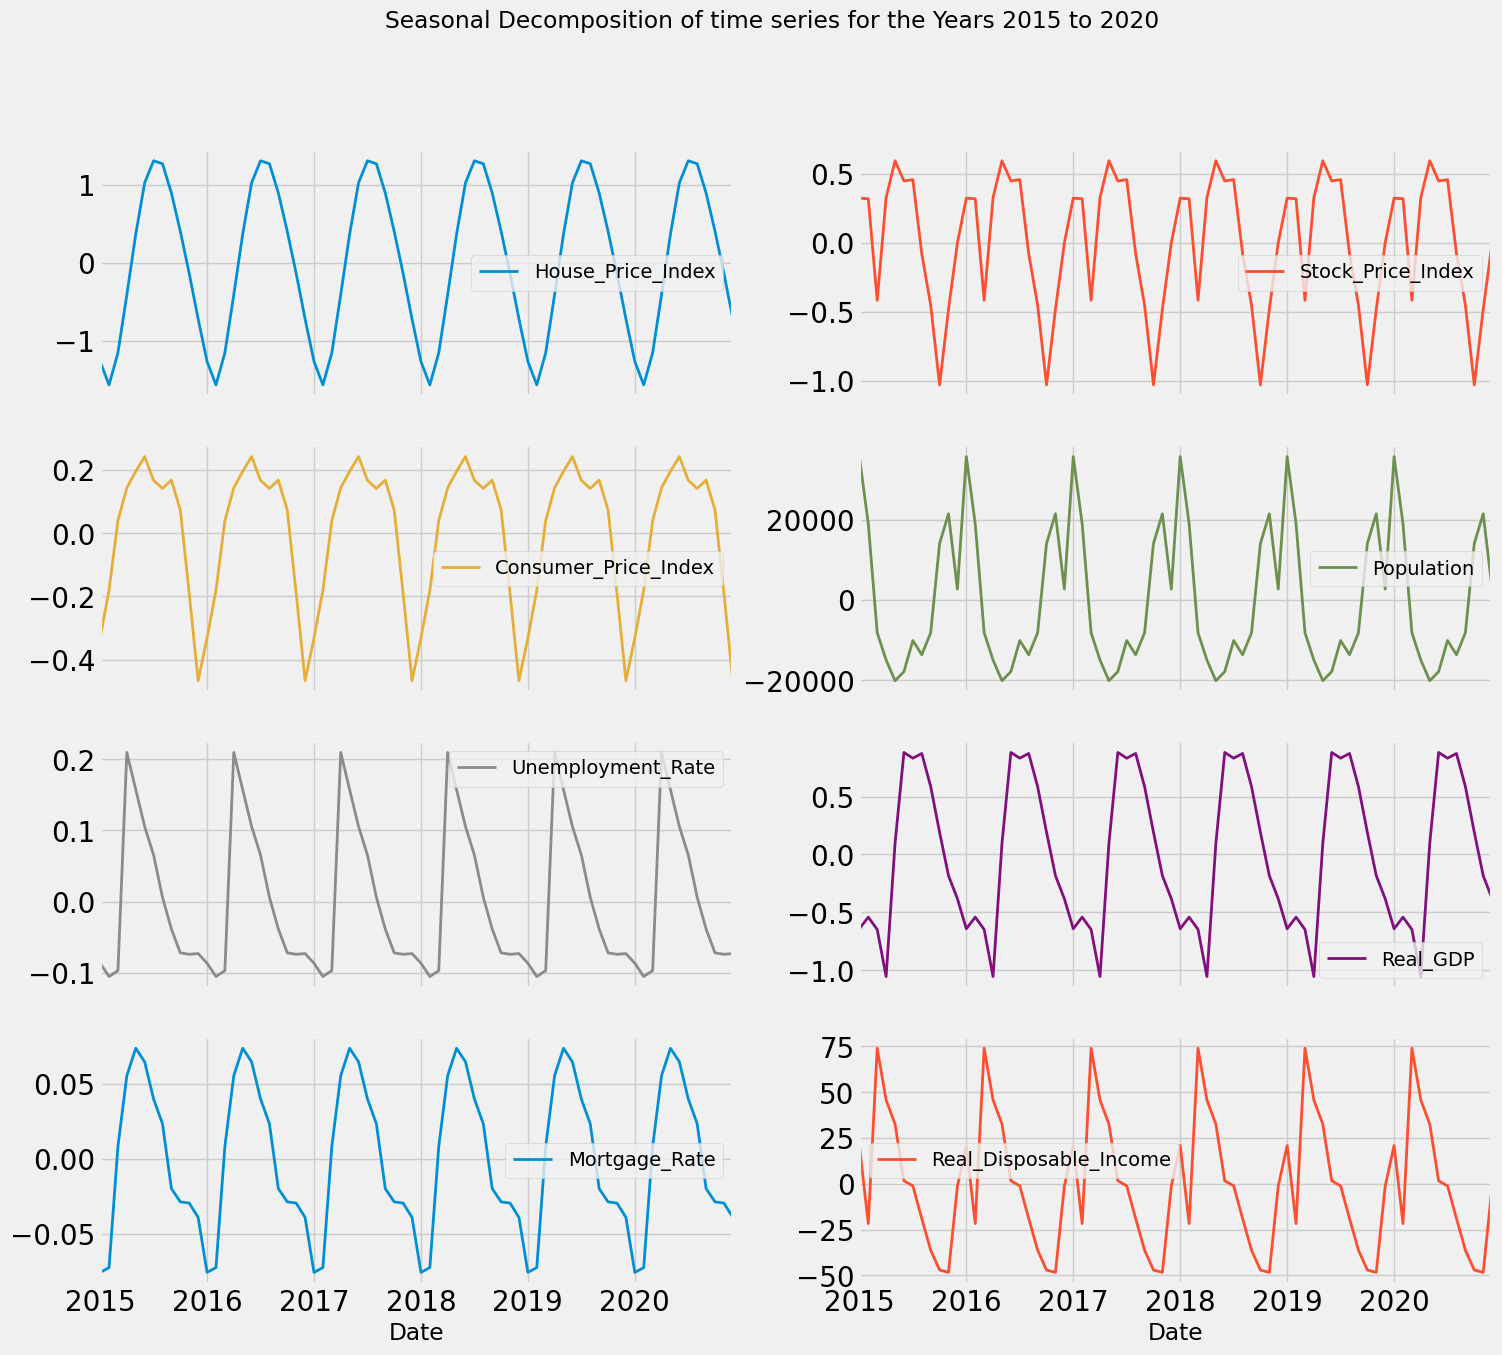

In [102]:
seasonality_dict = {}

for ts in df.columns:
    decompositions = sm.tsa.seasonal_decompose(df[ts].dropna())
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(seasonality_dict)["2015":"2020"].plot(subplots=True, layout=(4, 2), linewidth=2, title="Seasonal Decomposition of time series for the Years 2015 to 2020", fontsize=20)
plt.show()

### As expected for all time series, we can see that there is some kind of seasonal trend

---
### Trend Analysis

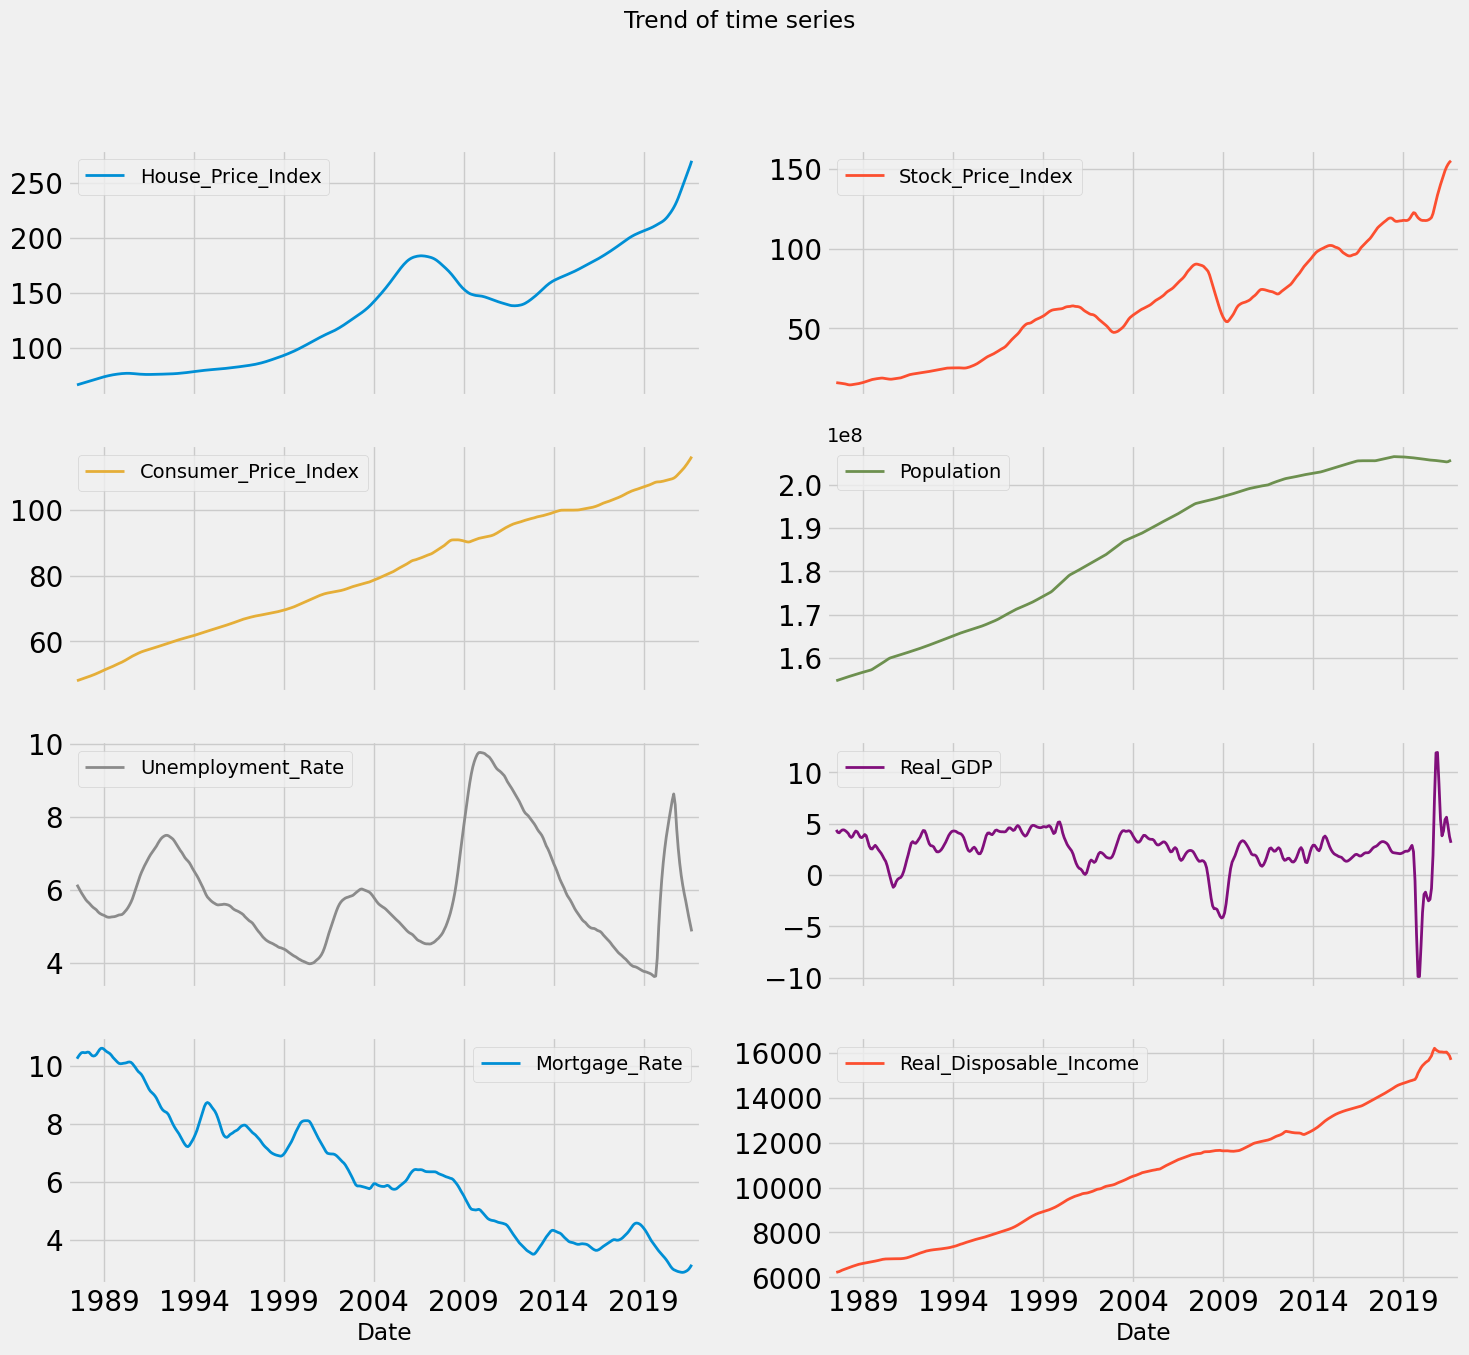

In [105]:
trend_dict = {}

for ts in df.columns:
    decompositions = sm.tsa.seasonal_decompose(df[ts].dropna())
    # Store the results back
    trend_dict[ts] = decompositions.trend

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(trend_dict).plot(subplots=True, layout=(4, 2), linewidth=2, title="Trend of time series", fontsize=20)
plt.show()

### As expected for all time series apart from Real GDP, we can see kind of trend either increasing or decreasing. Note that Unemployment rate seems to behave like a cyclical series over the longer term.

---

### Residuals : Random Noise


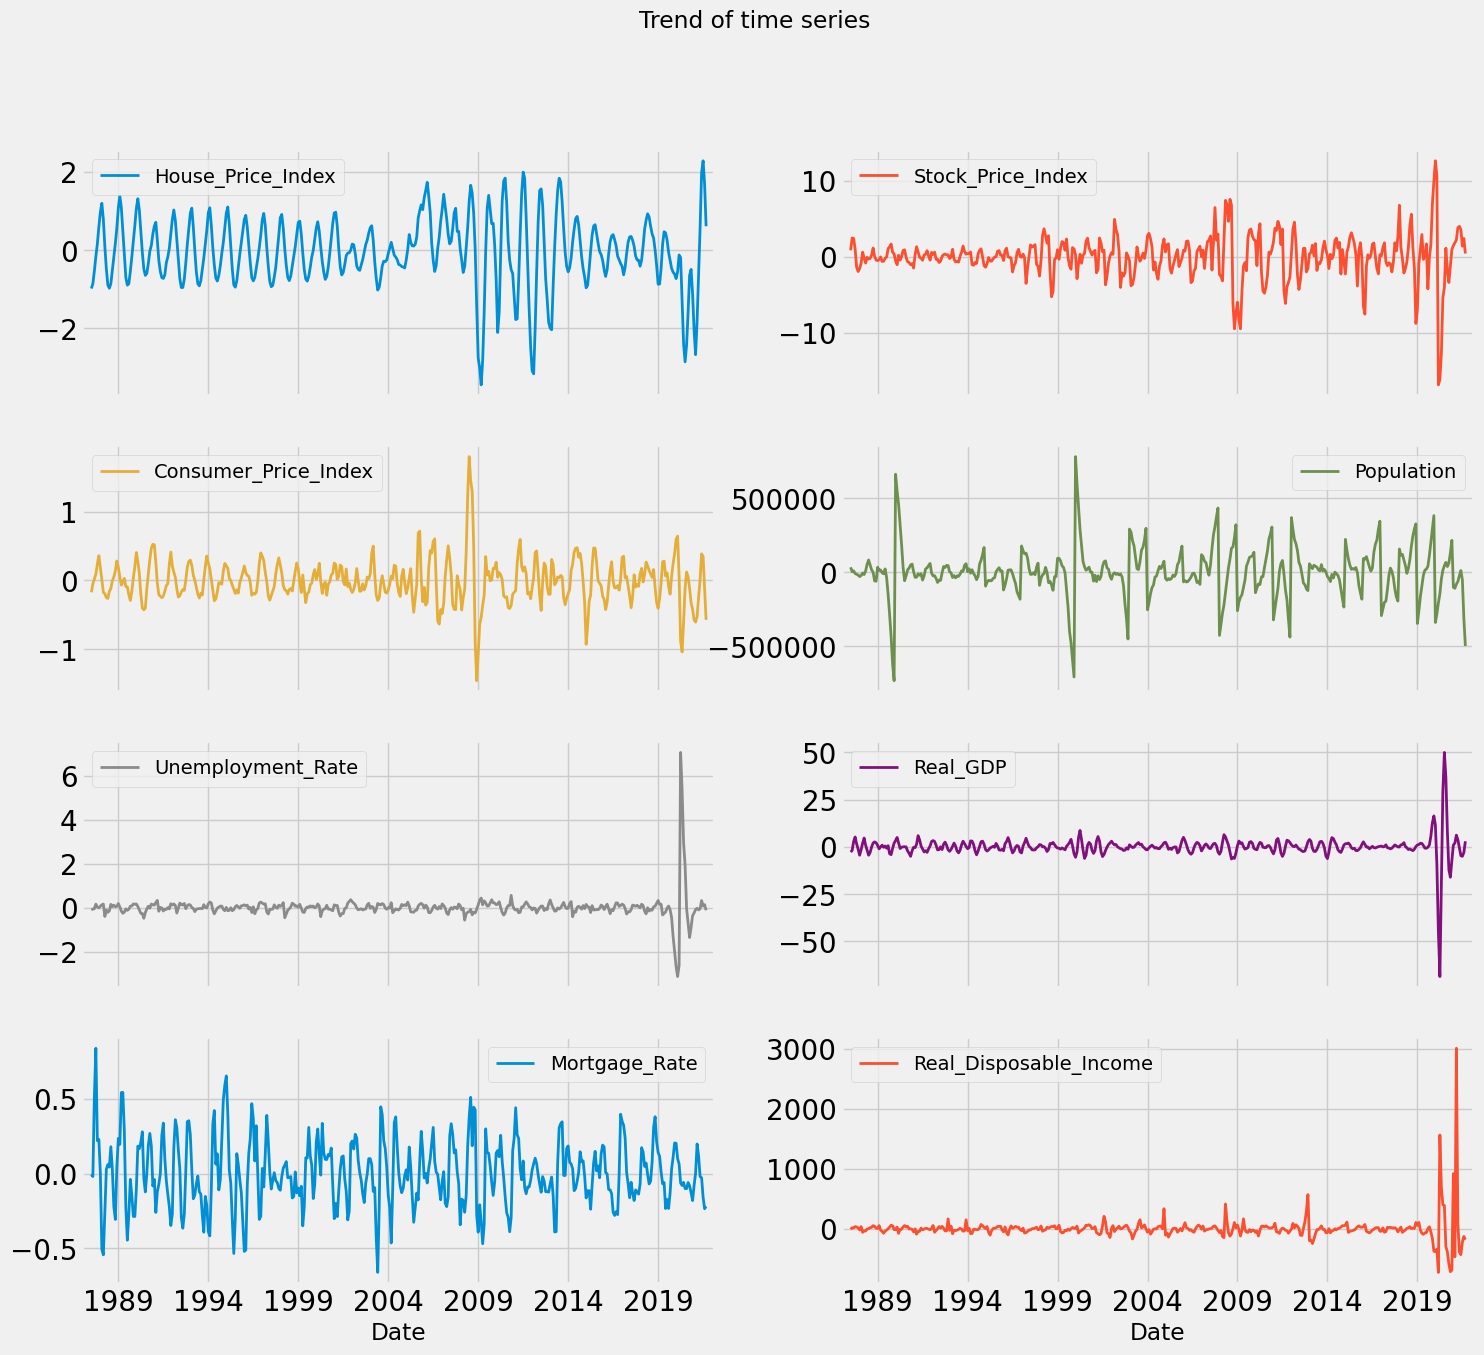

In [106]:
resid_dict = {}

for ts in df.columns:
    decompositions = sm.tsa.seasonal_decompose(df[ts].dropna())
    # Store the results back
    resid_dict[ts] = decompositions.resid

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(resid_dict).plot(subplots=True, layout=(4, 2), linewidth=2, title="Trend of time series", fontsize=20)
plt.show()